In [1]:
from konlpy.tag import Hannanum
import pandas as pd
def flatten(items): #2차원 리스트를 1차원 리스트로 변환
        flatList=[]
        for elem in items:
            if type(elem) == list: #자료형이 리스트이면
                for e in elem: #개별 원소를 추가
                    flatList.append(e)
            else: #리스트가 아니면 그대로 추가
                flatList.append(elem)
        return flatList

In [2]:
words_choice = ['우한', '중국', '미국', '일본', '유럽', 
                '신천지', '교회', '예배', '기독교',
                '예방', '증상', '백신', '감염',
                '시장', '경제', '지원금', '매출', '물가',
                '인강', '등교', '개학', '인터넷강의', '학교', '유치원']
#우울증, 일상, 포스트코로나, 
#재택근무, 고용, 실업
#

In [3]:
# 트위터 월별 데이터 2차원 리스트로 변환
from konlpy.tag import Hannanum
from tqdm import tqdm_notebook
temp_re=[]
def temp_re_made(m,d):
    for i in tqdm_notebook(range(d+1)[1:]):
        f=open(f'c:/data/twitter/twitter_{m}m{i}d.txt', encoding='utf-8')
        lines = f.readlines() 
        f.close()

        han=Hannanum() #한나눔 패키지
        temp=[]
        for j in range(len(lines)):
            a=lines[j].strip() #공백,줄바꿈,탭 제거
            b = han.nouns(a)
            c = list(filter(lambda x : x in words_choice, b))
            if len(c) != 0:
                temp.extend(c)
            else:
                pass
        temp_re.append(temp)

In [4]:
temp_re_made(1,31)
temp_re_made(2,29)
temp_re_made(3,31)
temp_re_made(4,30)
temp_re_made(5,31)

In [5]:
len(temp_re)

152

In [6]:
docs = temp_re
vocab = words_choice

In [7]:
from math import log
N=len(docs) #문서의 갯수

# tf - 문서 내에서 단어의 출현 횟수
def tf(t,d):
    return d.count(t)

# df : 특정 단어가 등장한 문서의 수
# idf : df에 반비례하는 수
def idf(t):
    df=0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

# tfidf : tf와 idf를 곱한 값
def tfidf(t,d):
    return tf(t,d) * idf(t)

In [9]:
import pandas as pd
result=[]
for i in range(N):
    result.append([])
    d=docs[i] #i번째 문서
    for j in range(len(vocab)): 
        t=vocab[j]#개별 단어
        result[-1].append(tf(t,d)) #tf 추가 추가

df_tf=pd.DataFrame(result, columns=vocab)

In [10]:
#idf 계산
result=[]
for j in range(len(vocab)):
    t=vocab[j]
    result.append(idf(t))

df_idf=pd.DataFrame(result,index=vocab, columns=['IDF'])

In [11]:
#tfidf 계산- 값이 크면 중요도가 높고 값이 작으면 중요도가 낮은 단어
from tqdm import tqdm_notebook

result=[]
for i in tqdm_notebook(range(N)):
    result.append([])
    d=docs[i]
    for j in range(len(vocab)):
        t=vocab[j]
        result[-1].append(tfidf(t,d))
        
df_tfidf=pd.DataFrame(result, columns=vocab)  

In [12]:
df_tfidf

,우한,중국,미국,일본,유럽,신천지,교회,예배,기독교,예방,...,경제,지원금,매출,물가,인강,등교,개학,인터넷강의,학교,유치원
0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,0.179693,0.814396,0.489514,1.195239,0.00000,4.610718,0.000000,0.0,0.000000,...,0.000000,3.958716,0.000000,0.0,0.0,7.376793,1.286211,0.0,2.145274,0.0
148,0.0,0.539080,0.814396,0.734271,0.000000,0.00000,0.000000,0.000000,0.0,0.629431,...,0.000000,1.979358,1.765784,0.0,0.0,2.458931,1.286211,0.0,0.000000,0.0
149,0.0,0.359387,1.017995,1.468542,0.000000,0.60504,2.305359,6.626339,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,3.217910,0.0
150,0.0,1.078161,0.610797,0.979028,0.000000,0.60504,0.000000,0.000000,0.0,0.000000,...,0.667172,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.072637,0.0


In [47]:
df_summary = pd.DataFrame(df_tfidf[['우한','중국','미국','일본','유럽']].sum(axis=1),columns=['국제'])
df_summary['종교'] = pd.DataFrame(df_tfidf[['신천지', '교회', '예배', '기독교']].sum(axis=1))
df_summary['의료'] = pd.DataFrame(df_tfidf[['예방', '증상', '백신', '감염']].sum(axis=1))
df_summary['시장'] = pd.DataFrame(df_tfidf[['시장', '경제', '지원금', '매출', '물가']].sum(axis=1))
df_summary['교육'] = pd.DataFrame(df_tfidf[['인강', '등교', '개학', '인터넷강의', '학교', '유치원']].sum(axis=1))
df_summary = df_summary.set_index(pd.date_range('2020-1-1',periods=152))
df_summary

,국제,종교,의료,시장,교육
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-04,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2020-05-27,2.678842,4.610718,1.271943,6.264075,10.808278
2020-05-28,2.087747,0.000000,3.330784,3.745142,3.745142
2020-05-29,2.845924,9.536738,1.525780,0.000000,3.217910
2020-05-30,2.667986,0.605040,0.375197,0.667172,1.072637


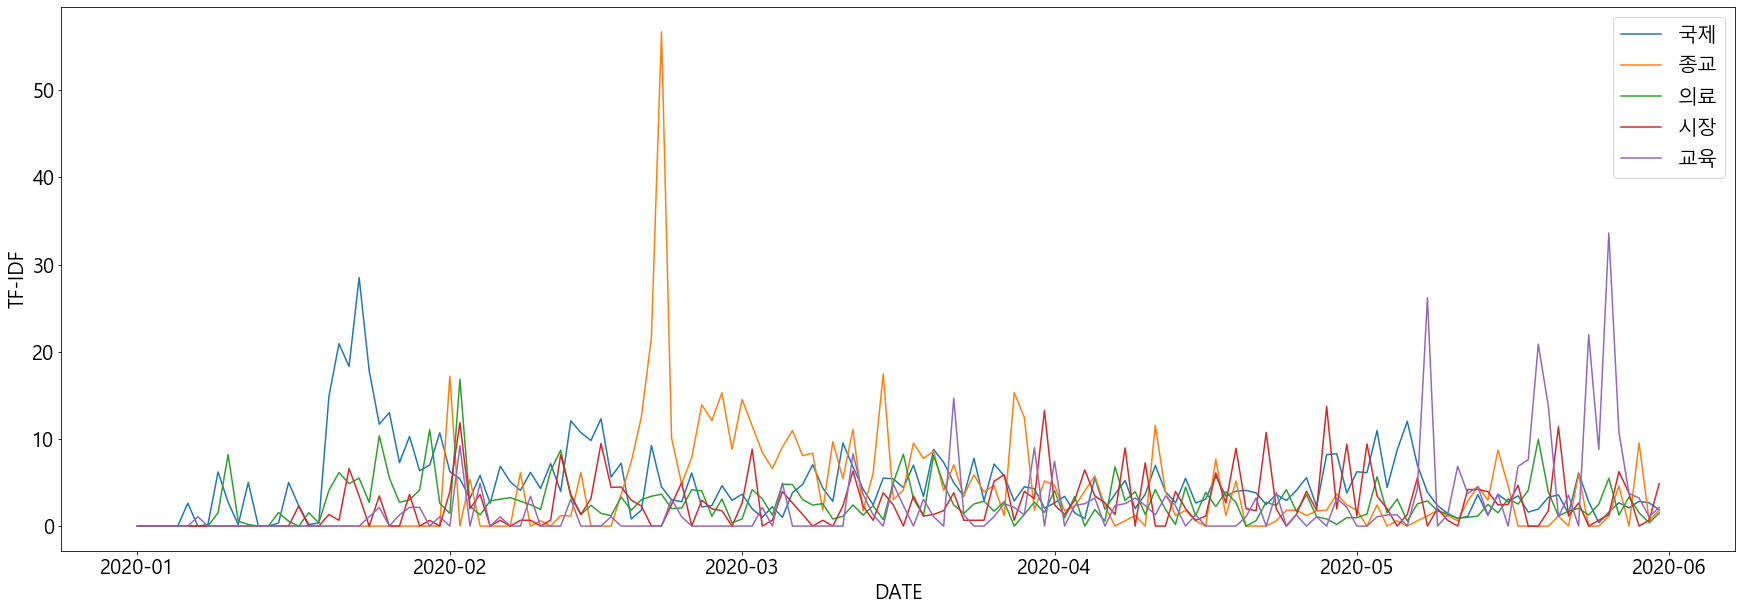

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name, size = 20)
plt.figure(figsize=(30,10))
plt.plot(df_summary)
plt.xlabel('DATE')
plt.ylabel('TF-IDF')
plt.legend(df_summary.columns, loc='upper right')
plt.show()

In [54]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [56]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [110]:
df_forcast1 = pd.DataFrame(df_summary[['국제']])
df_forcast1.reset_index(inplace=True)
df_forcast1.columns = ['ds','y']

In [91]:
df_forcast2 = pd.DataFrame(df_summary[['종교']])
df_forcast2.reset_index(inplace=True)
df_forcast2.columns = ['ds','y']

In [92]:
df_forcast3 = pd.DataFrame(df_summary[['의료']])
df_forcast3.reset_index(inplace=True)
df_forcast3.columns = ['ds','y']

In [93]:
df_forcast4 = pd.DataFrame(df_summary[['시장']])
df_forcast4.reset_index(inplace=True)
df_forcast4.columns = ['ds','y']

In [94]:
df_forcast5 = pd.DataFrame(df_summary[['교육']])
df_forcast5.reset_index(inplace=True)
df_forcast5.columns = ['ds','y']

In [100]:
def future_graph(df):
    #Prophet에선 기본적으로 트렌드가 변경되는 지점을 자동으로 감지해 트렌드를 예측해준다.
    m = Prophet(
        changepoint_prior_scale=0.5, #Change Point의 유연성을 조정하는 방법: 디폴트는 0.05(값이 커질수록 유연해진다)
        changepoint_range=0.9, # 기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정해주지만 90%로 설정해준다.
    )
    m.fit(df)
    #미래 dataframe
    future = m.make_future_dataframe(periods=30)#현재까지의 날짜로부터 30일의 미래
    forecast = m.predict(future)
    fig = plot_plotly(m, forecast)
    py.iplot(fig)
    #점이 없이 선만 있는 부분이 예측된 미래

In [101]:
future_graph(df_forcast1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
future_graph(df_forcast2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
future_graph(df_forcast3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
future_graph(df_forcast4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
future_graph(df_forcast5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
